In [5]:
import numpy as np
import pandas as pd


**1.Preliminary Data Analysis**

1.1 Loading the data

In [6]:
#importing and preprocessing data
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

#visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#training data
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as ltb

#checking models accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
df=pd.read_csv('/content/adultincome_data (1).csv')

1.2 About the Dataset

1.Age: Describes the age of individuals. Continuous.

2.Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3.fnlwgt: Continuous.

4.Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5.Education-num: Number of years spent in education. Continuous.

6.Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7.Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8.Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9.Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10.Sex: Female, Male.

11.Capital-gain: Continuous.

12.Capital-loss: Continuous.

13.Hours-per-week: Continuous.

14.Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15.Salary: >50K,<=50K

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<50k


In [9]:
df['salary']

,salary
0,<50k
1,<50k
2,<50k
3,<50k
4,<50k
...,...
32556,<50k
32557,>=50k
32558,<50k
32559,<50k


1.3 Columns & thier Data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


*   The dataset contains absolutely no null values!
*   Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
*   Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.






1.4 Summary Statistics

In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1 There's _**no missing data**_ as all counts are same.
2 There is _**presence of outliers**_ in the dataset in various columns.
3 There data has _**skewness**_ too.

1.5 Distinct column Values


In [12]:
for i in df.columns:
  print(i,':',df[i].unique())

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt : [ 77516  83311 215646 ...  34066  84661 257302]
education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishin

We can observe that the workclass,occupation & country column has '?' values which means none.

1.5.1 Amount of wrong column values in the dataset


In [13]:
for i,j in zip(df.columns,(df.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 1836 records
occupation: 1843 records
country: 583 records


1.5.2 Visualizing each column to make fill in the correct values.

1.5.2.1 Workclass


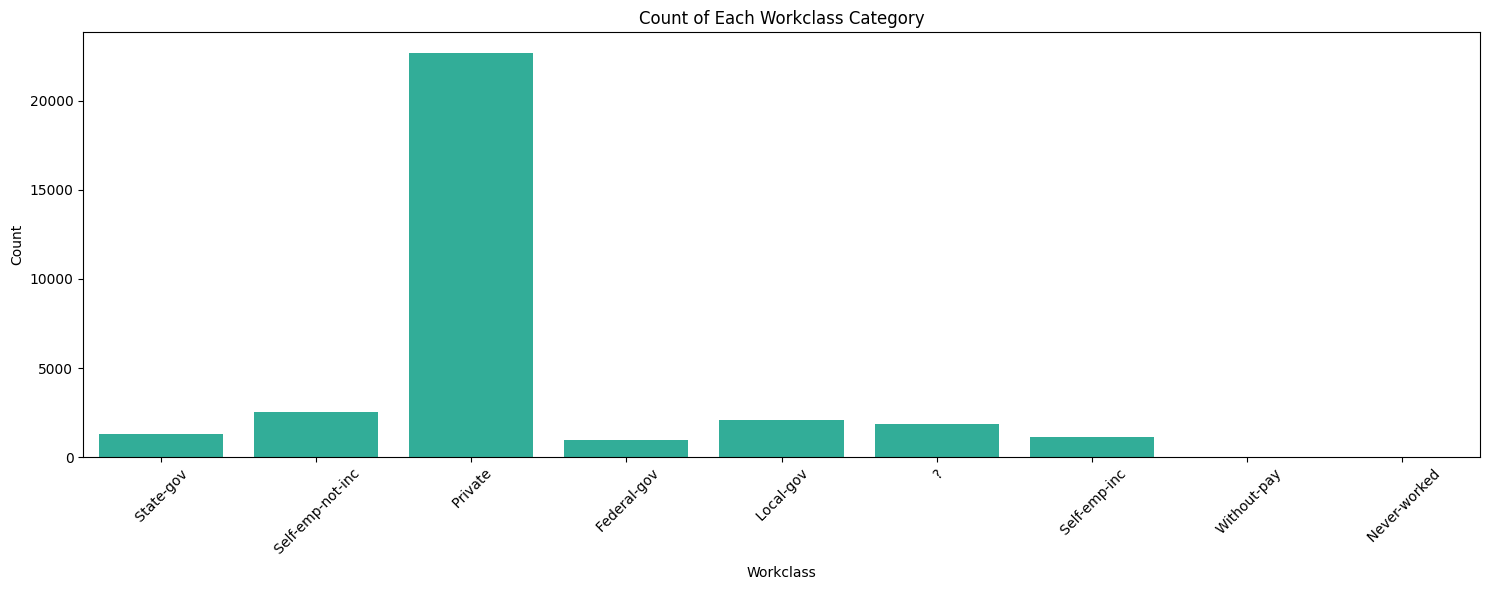

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='workclass', color="#1dc2a6")

plt.xticks(rotation=45)
plt.title('Count of Each Workclass Category')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

1.   The dominant values are only of Private Sector.
2.   ? does not have signifacnt values or contribution ot the dataset



1.5.2.2 Country


/tmp/ipython-input-2170379269.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(df_con["country"], rotation=90)


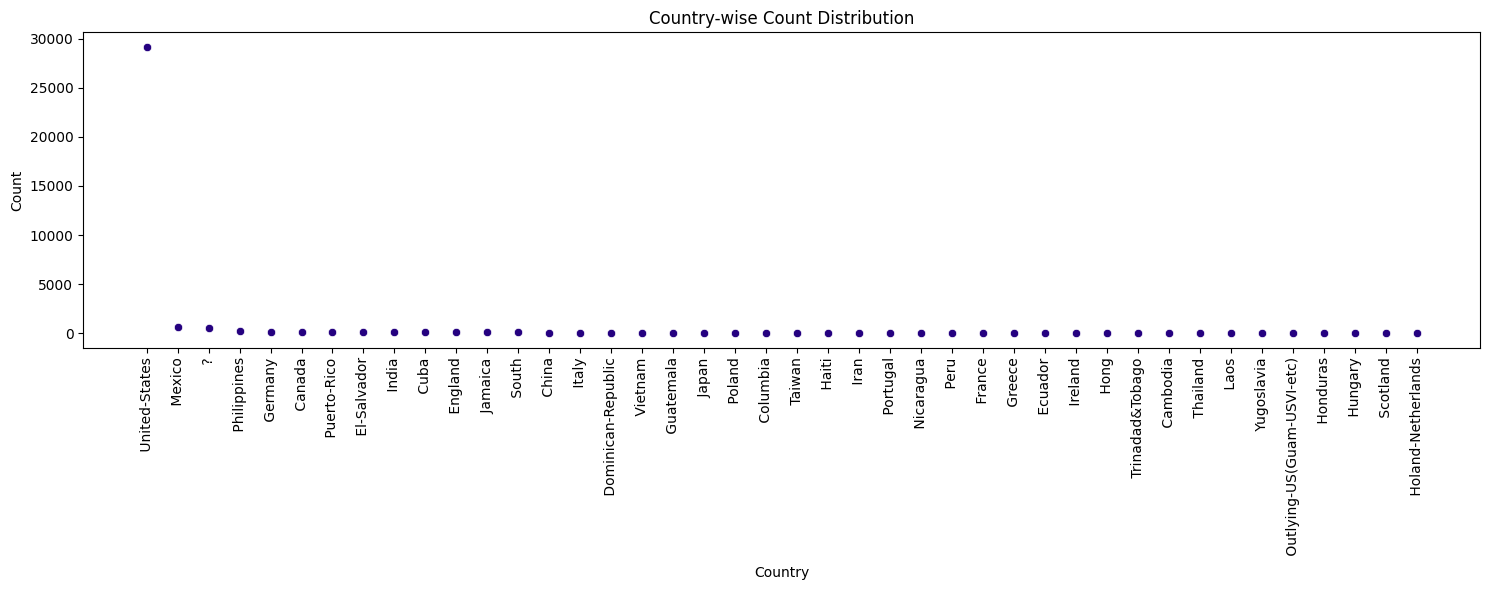

In [15]:
df_con = pd.DataFrame(df["country"].value_counts()).reset_index()
df_con.columns = ["country", "count"]  # Rename columns for clarity

# Plot
plt.figure(figsize=(15, 6))
g = sns.scatterplot(data=df_con, x="country", y="count", color="#250180")

# Rotate x-axis labels
g.set_xticklabels(df_con["country"], rotation=90)

plt.title("Country-wise Count Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

1.   The dominant values are only of United-States.
2.   ? does not have signifacnt values or contribution ot the dataset.



1.5.2.3 Occupation

Text(0, 0.5, 'Count')

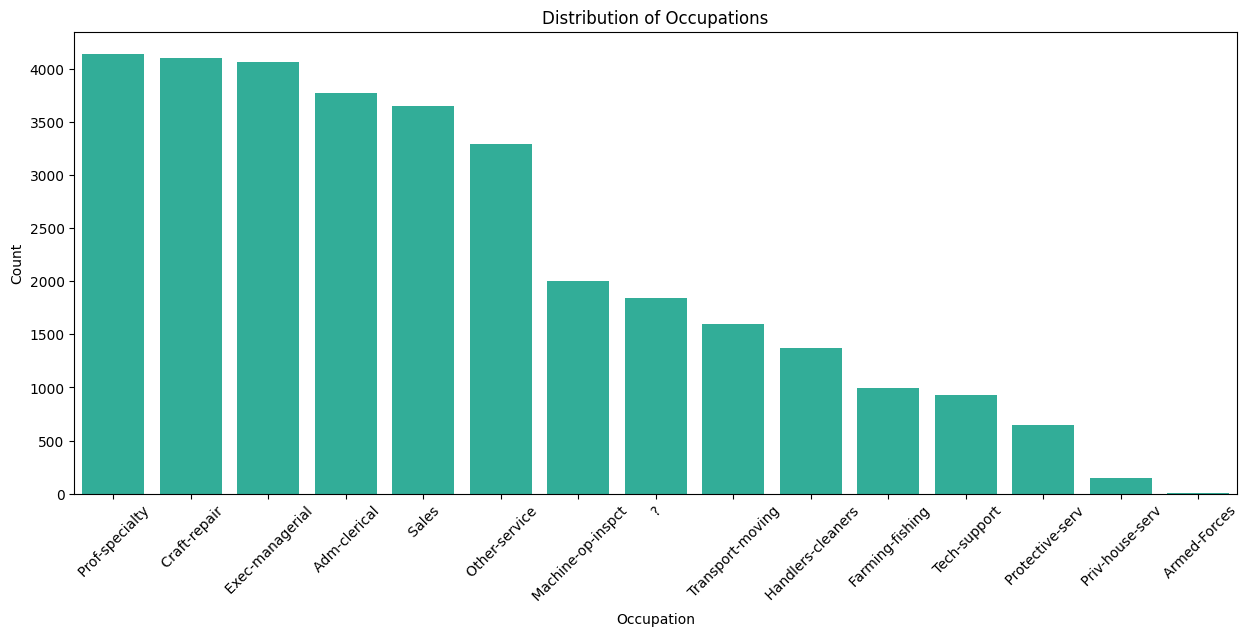

In [16]:
df = pd.read_csv('/content/adultincome_data (1).csv')

# Count the occurrences of each occupation
occupation_counts = df['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(data=occupation_counts, x='occupation', y='count', color="#1dc2a6")

# Format plot
plt.xticks(rotation=45)
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')

Now we have to remove the (?) mark in the graph

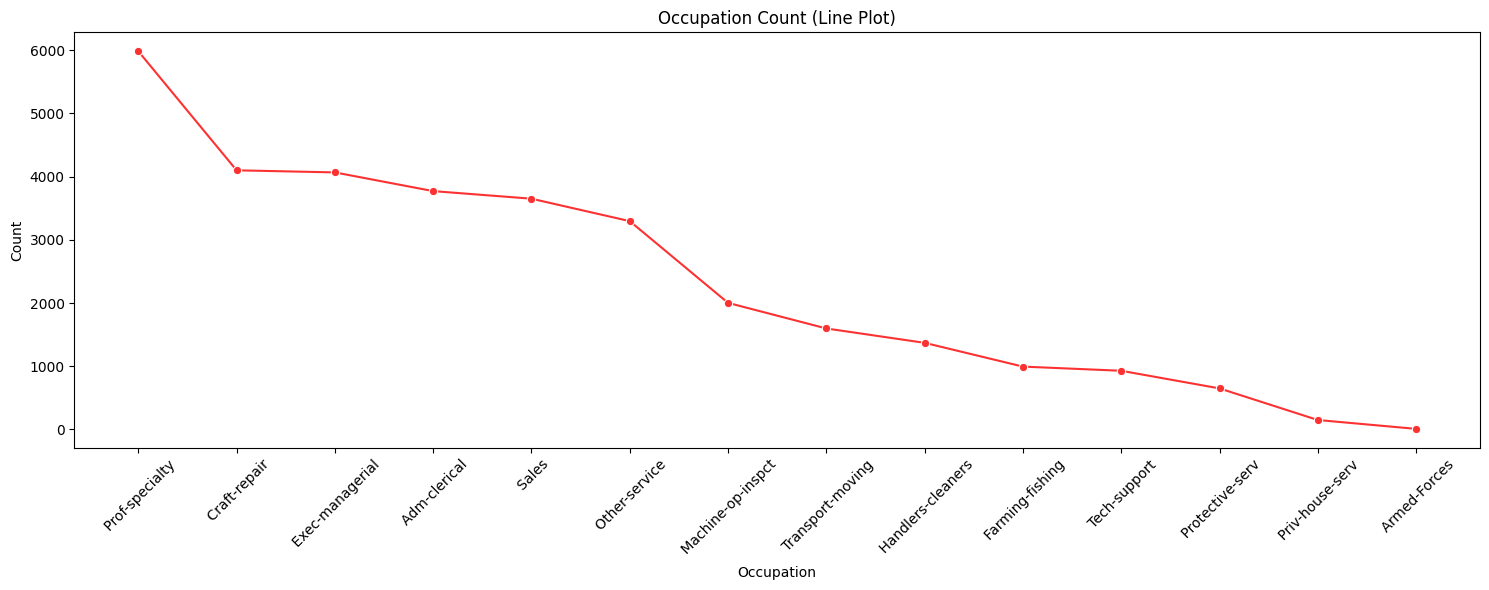

In [17]:
df = pd.read_csv('/content/adultincome_data (1).csv')

# Clean the 'occupation' column
df["occupation"] = df["occupation"].replace(' ?', np.nan)
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])

# Get value counts
df_con = df["occupation"].value_counts().reset_index()
df_con.columns = ["occupation", "count"]

# Plot line chart
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_con, x="occupation", y="count", color="#fc3232", marker='o')

# Format plot
plt.xticks(rotation=45)
plt.title("Occupation Count (Line Plot)")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The issue has been resolved and we get the clean dataset without any missing values

**2.Exploratory Data Analysis**

2.1.1 Race

In [18]:
import plotly.express as px

# Clean the 'race' column (optional if there are '?', 'nan', etc.)
df = df[df['race'].notna() & (df['race'] != ' ?')]

# Create value counts
race_counts = df['race'].value_counts().reset_index()
race_counts.columns = ['race', 'count']

# Create interactive pie chart
fig = px.pie(race_counts, names='race', values='count',
             title='Distribution of Race',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Show the interactive plot
fig.show()

We infer that the max race value is white therefore it can be grouped into white and non-whites.

2.1.2 Hours per Week

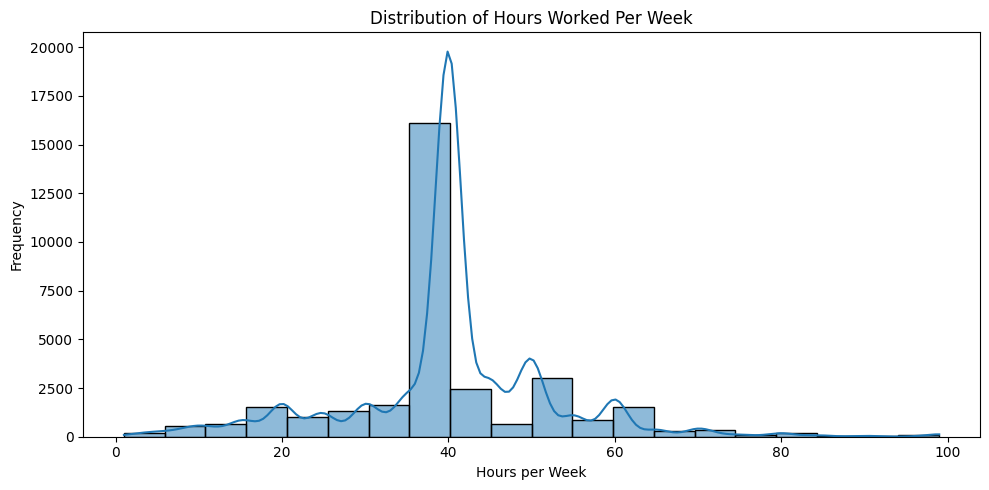

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='hours-per-week', bins=20, color='#1f77b4', kde=True)
plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This shows the distribution of hours per week.
MAX per hour value is 40hrs

2.2 Visualising relationships of all columns with salary.

2.2.1 Age & Salary

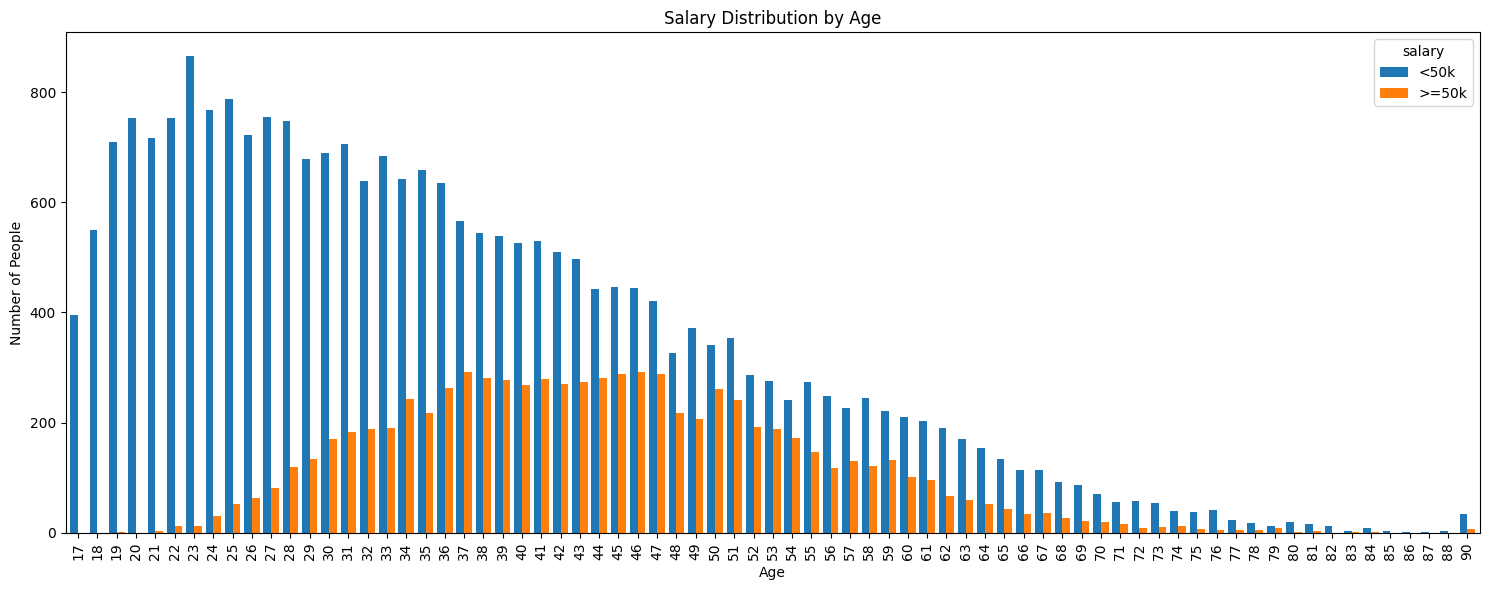

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/adultincome_data (1).csv')

# Clean column names (removes leading/trailing spaces and lowercases everything)
df.columns = df.columns.str.strip().str.lower()

# ✅ Confirm the column names (optional)
# print(df.columns.tolist())

# Create a crosstab: age vs salary
crosstb = pd.crosstab(df['age'], df['salary'])

# Plot the crosstab as a bar chart
barplot = crosstb.plot.bar(figsize=(15, 6), width=0.8)

# Format the plot
plt.xticks(rotation=90)
plt.title('Salary Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()


1.  We infer that min salary of most of the population is in their 20's which is a valid as it is the starting time of a career
2. Age and Salary are in direct proportion with each other.  



2.2.2 Workclass & Salary

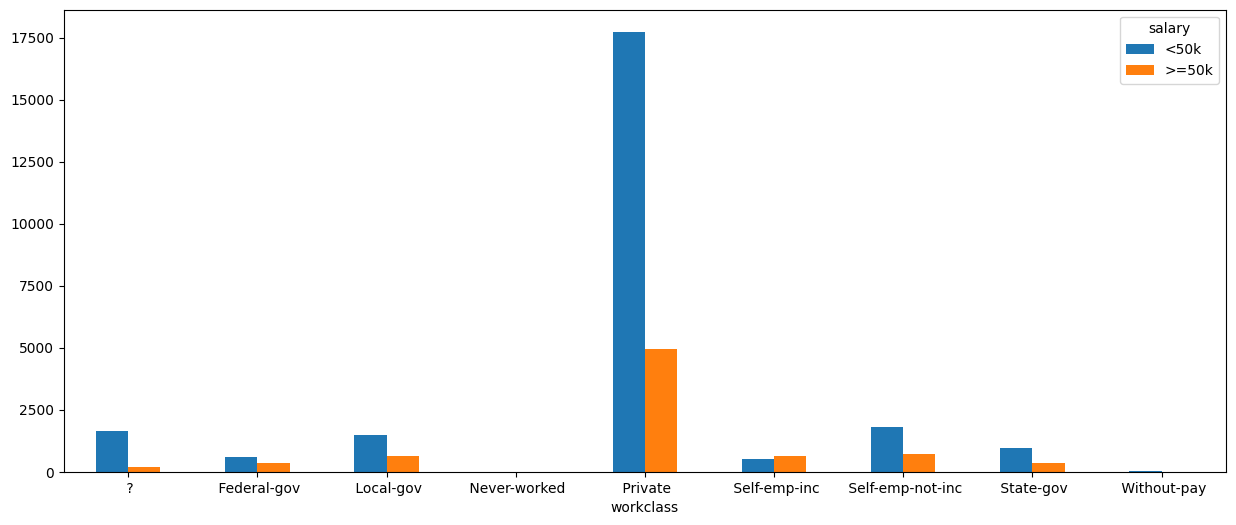

In [21]:
crosstb = pd.crosstab(df.workclass, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

Question mark solved

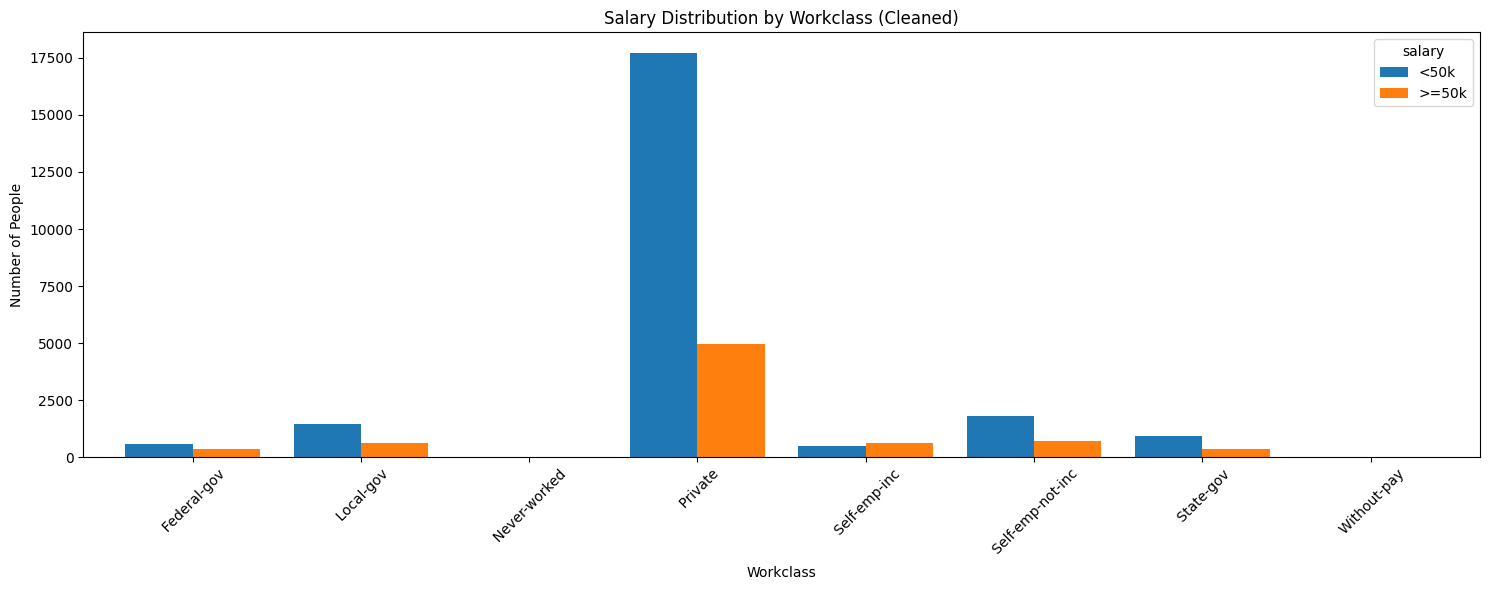

In [22]:

df.columns = df.columns.str.strip().str.lower()

df = df[(df['workclass'] != ' ?') & (df['salary'] != ' ?')]

crosstb = pd.crosstab(df['workclass'], df['salary'])

# Plot the bar chart
barplot = crosstb.plot.bar(figsize=(15, 6), width=0.8)

plt.xticks(rotation=45)
plt.title('Salary Distribution by Workclass (Cleaned)')
plt.xlabel('Workclass')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

1.   We infer that salary of most of the population be it <= or > 50k is occupied by the Private sector.
2.   Only a very few people belonging to private sector have a salary >50k, but it is still more than the sum total of all other sectors recieving salary >50k.



2.2.3 Education and Salary

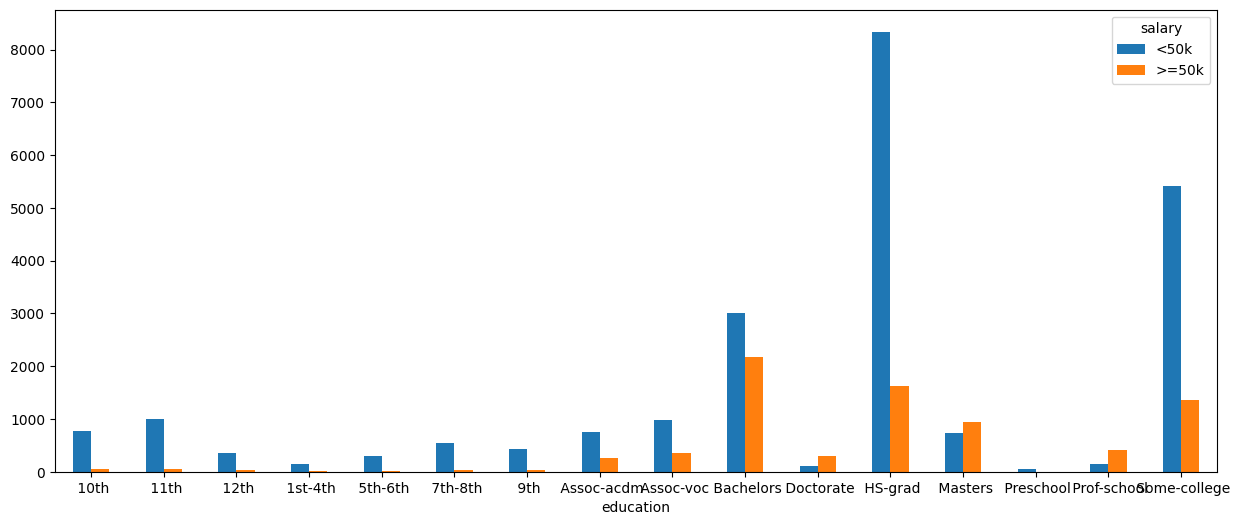

In [23]:
crosstb = pd.crosstab(df.education, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

We infer that the population is broadly divided into three groups:
1.Bachelors: A person having a bachelors degree has 60:40 chances of getting <= or > 50 k salary.  
2.HS-grad: A person being a highschool graduate has 95:05 chances of getting <= or > 50 k salary. As most of the population is concentrated in highschool passout this reflects that most of the people do not cotinue their studies after school.
3.Some-college: A person attended a college but has no degree is certainly likely to have 75:25 chances of getting <= or > 50 k salary. Surprisingly their are good number of people in this category which is a huge liability to the county and the person itself as they're not getting jobs according to their capabilites.





2.2.4 Marital Status & Salary

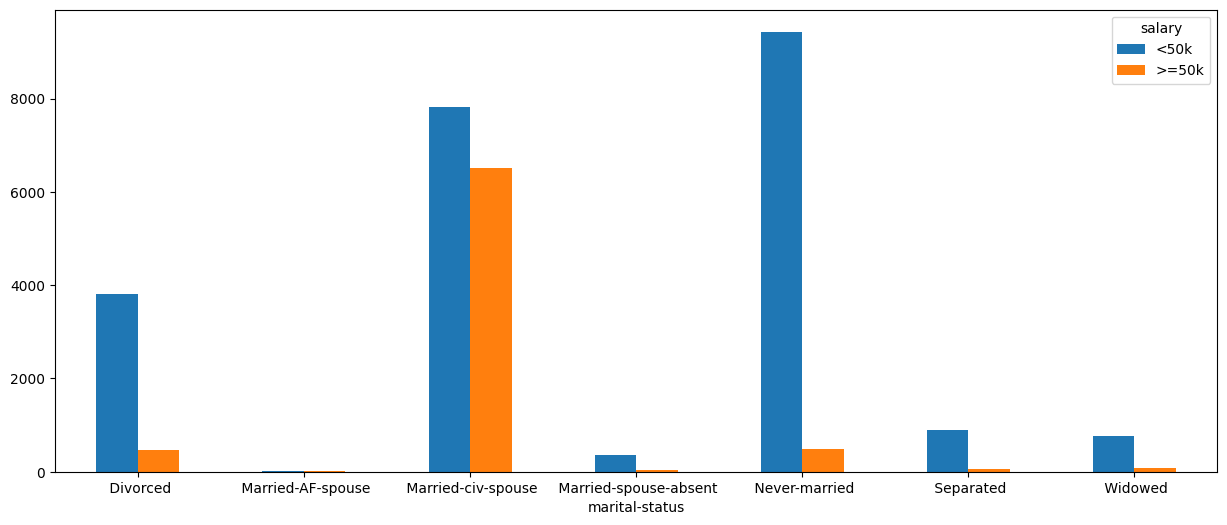

In [24]:
crosstb = pd.crosstab(df["marital-status"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Divorced: A divorced person has 90:10 chances of getting <= or > 50 k salary
2. Married-civ-spouse: A person married to a civillian spouse has 53:47 chances of getting <= or > 50 k salary. People in this domain are almost equal in number.
3. Never-married: A person who has never married has 95:05 chances of getting <= or > 50 k salary. Most of the population is concentrated in this domain.​Another noticable thing is that people who marry a spouse in armed forcues have and equal chance of getting <= or > 50 k salary.

2.2.5 Occupation & Salary

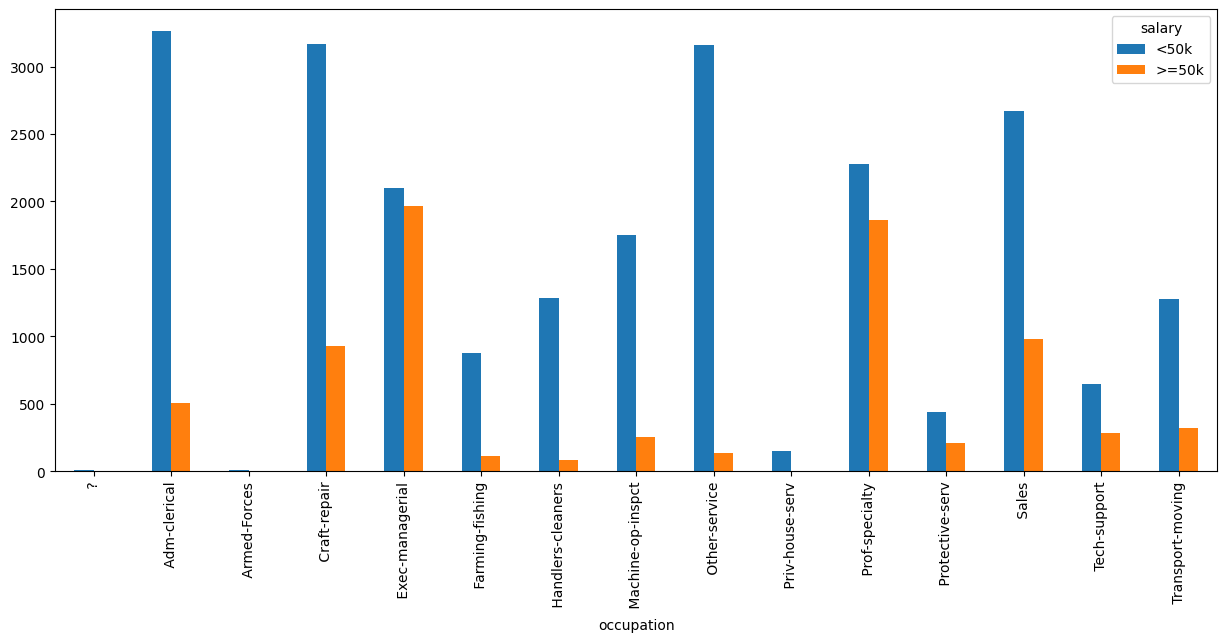

In [25]:
crosstb = pd.crosstab(df.occupation, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

1. Population is distributed in all of the occupational fields with minimum in armed forces & maximum in prof-speciality
2. Being in an executive managerial position gives almost equal chances of getiing a <= or > 50k salary.

2.2.6 Relationship & Salary

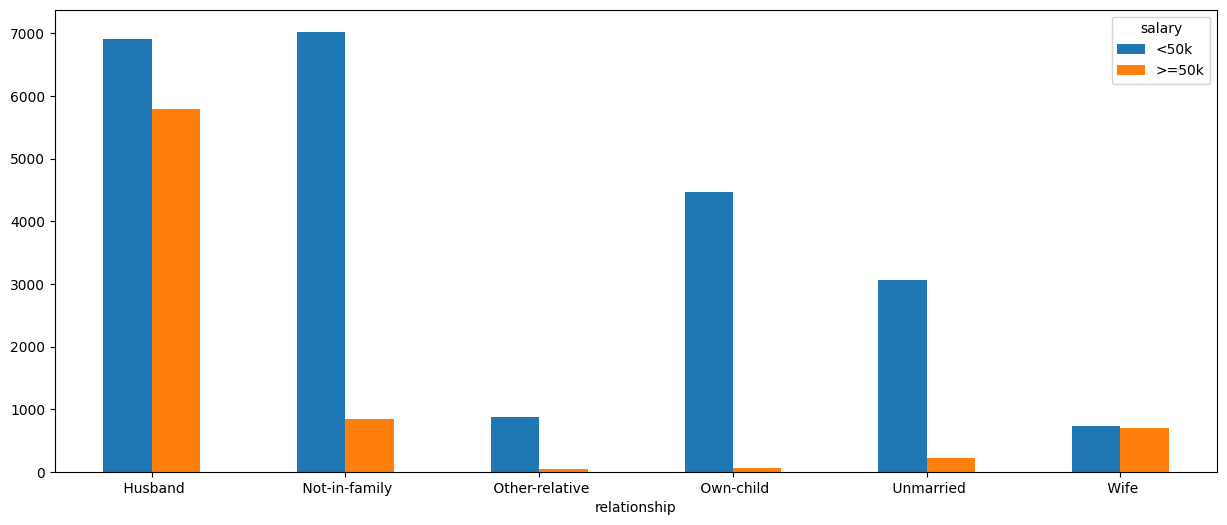

In [26]:
crosstb = pd.crosstab(df.relationship, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the people who are earning lie in the category of husbands. They have a 55:45 chances of getting <= or > 50 k salary.
2. A person being an earning wife has equal chances of getting <= or > 50 k salary

2.2.7 Race & Salary

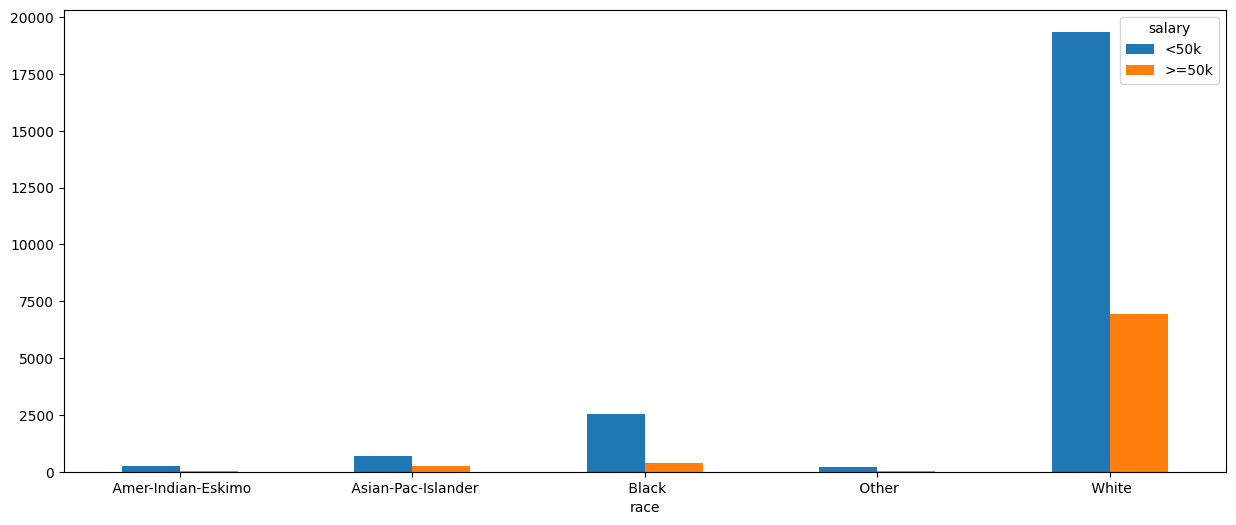

In [27]:
crosstb = pd.crosstab(df.race, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

Most of the population is white and has 75:25 chance of getting <= or > 50 k salary

2.2.8 Gender & Salary

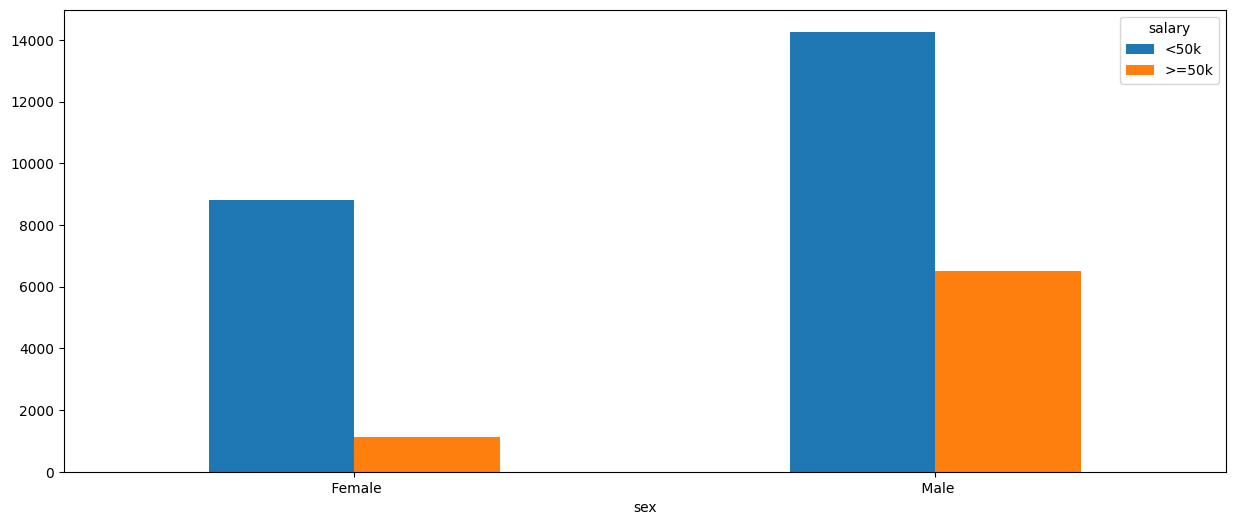

In [28]:
crosstb = pd.crosstab(df.sex, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the earning populations is male and has 70:30 chance of getting <= or > 50 k salary.
2. Females have 90:10 chance of getting <= or > 50 k salary.

2.2.9 Country & Salary

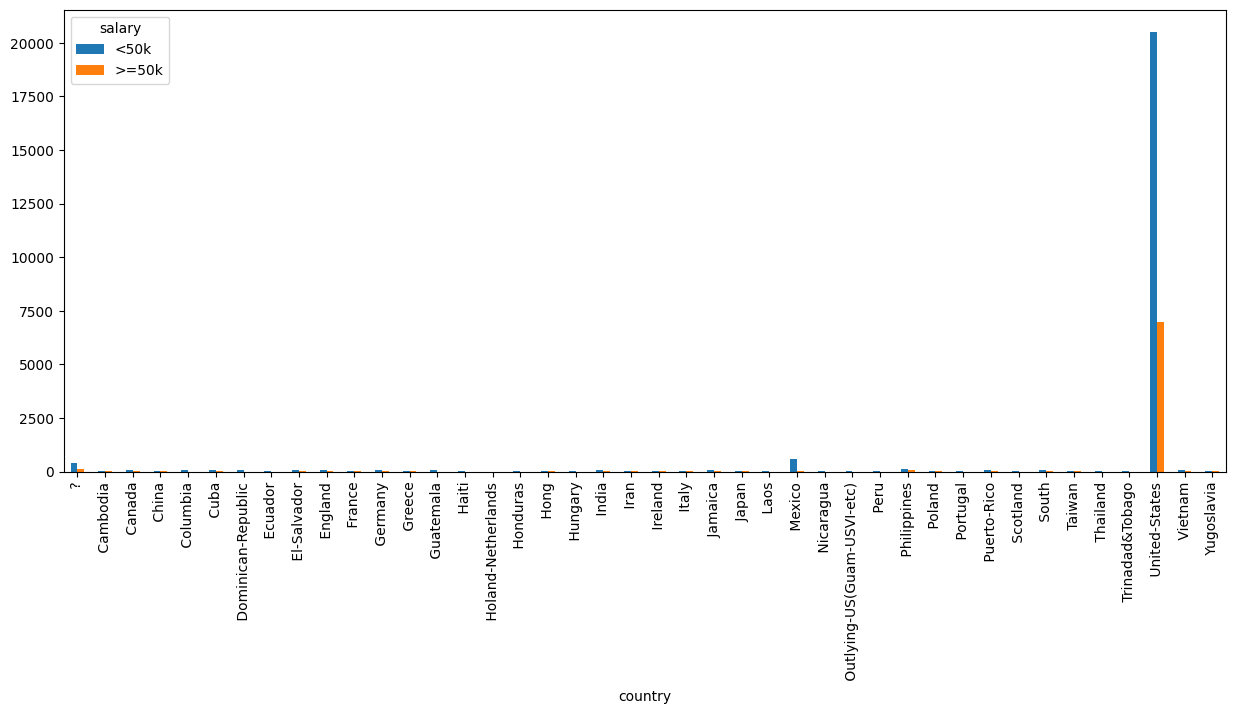

In [29]:
crosstb = pd.crosstab(df.country, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

The only country having max population is United-States where 75:25 is the chance of getting <= or > 50 k salary.

2.2.10 Hours Per Week & Salary

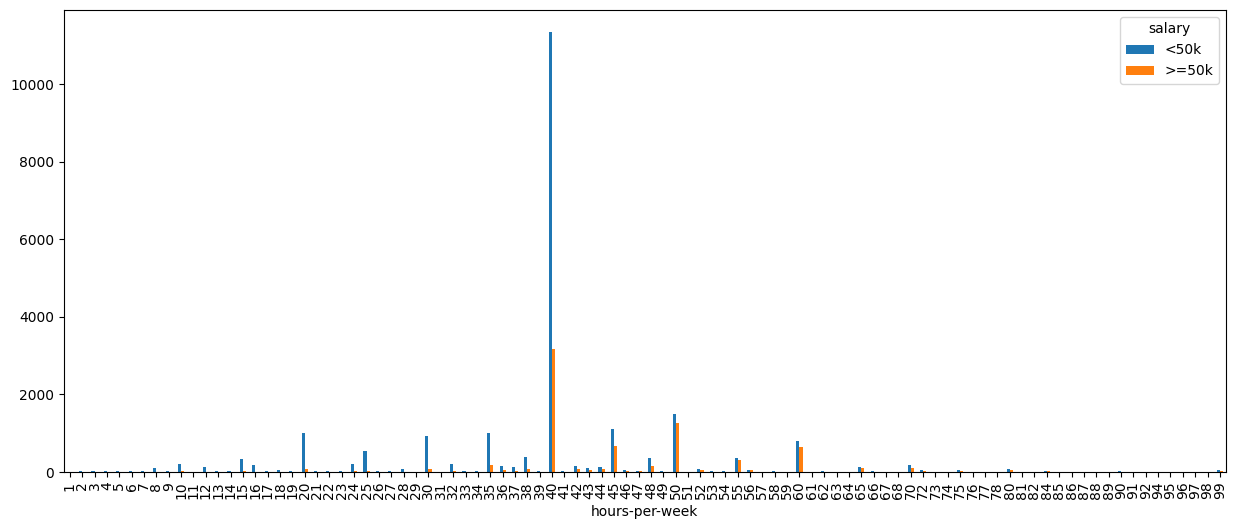

In [30]:
crosstb = pd.crosstab(df["hours-per-week"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize=(15,6))
plt.xticks(rotation = 90)
plt.show()

Most of the people work for 40 hours per week & have 77:35 chance of getting <= or > 50 k salary.

2.2.11 Education number,Race & Salary

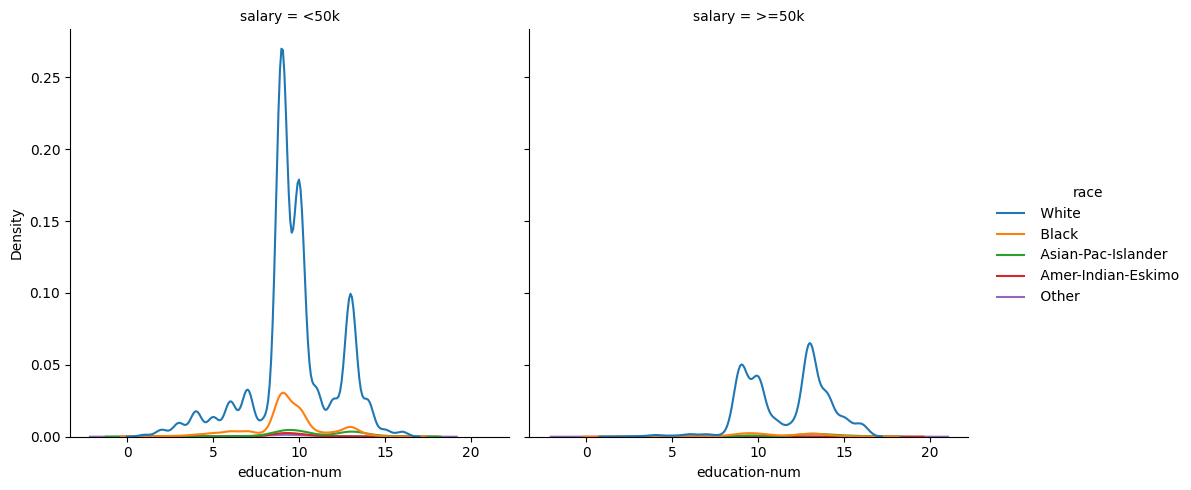

In [31]:
sns.displot(data=df, x=df["education-num"], hue=df["race"], col=df["salary"], kind="kde")

1. Most of the people who are white recieve education for around 9 years and get a salary of <=50 k.
2. Very few white people seem to get education for around 13 years and recieve a salary of >50 k.
3. All other races do not get that much education and therefore have low salary.



2.2.12 Hours per week,relationship & Salary

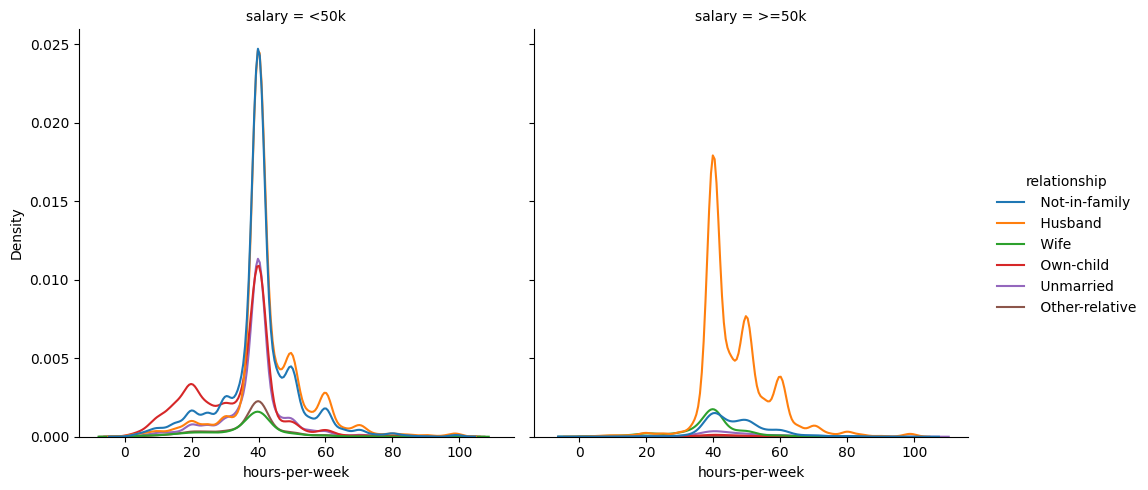

In [32]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["relationship"], col=df["salary"], kind="kde")



1.   Most of the people who are not in family work for around 40 hours per week and get a salary of <=50 k.
2.   People who have a relationship of husband work for around 40 hours per week and recieve a salary of >50 k



 **3. Data Preprocessing**

3.1 Grouping and encoding all the categorical columns.

In [33]:
for dataset in [df]:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 0
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 1
    dataset.loc[dataset['race'] != ' White', 'race'] = 0
    dataset.loc[dataset['race'] == ' White', 'race'] = 1
    dataset.loc[dataset['workclass'] != ' Private', 'workclass'] = 0
    dataset.loc[dataset['workclass'] == ' Private', 'workclass'] = 1
    dataset.loc[dataset['hours-per-week'] <= 40, 'hours-per-week'] = 0
    dataset.loc[dataset['hours-per-week'] > 40, 'hours-per-week'] = 1
for col in df[df.columns]:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df = df.astype(int)
df=df.drop(["education"],axis=1)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,13,4,1,1,1,1,2174,0,0,1,0
1,50,0,83311,13,2,4,0,1,1,0,0,0,1,0
2,38,1,215646,9,0,6,1,1,1,0,0,0,1,0
3,53,1,234721,7,2,6,0,0,1,0,0,0,1,0
4,28,1,338409,13,2,10,5,0,0,0,0,0,0,0


We dropped the education column because it is same as education-num.

3.2 Plotting graphs for numerical columns.

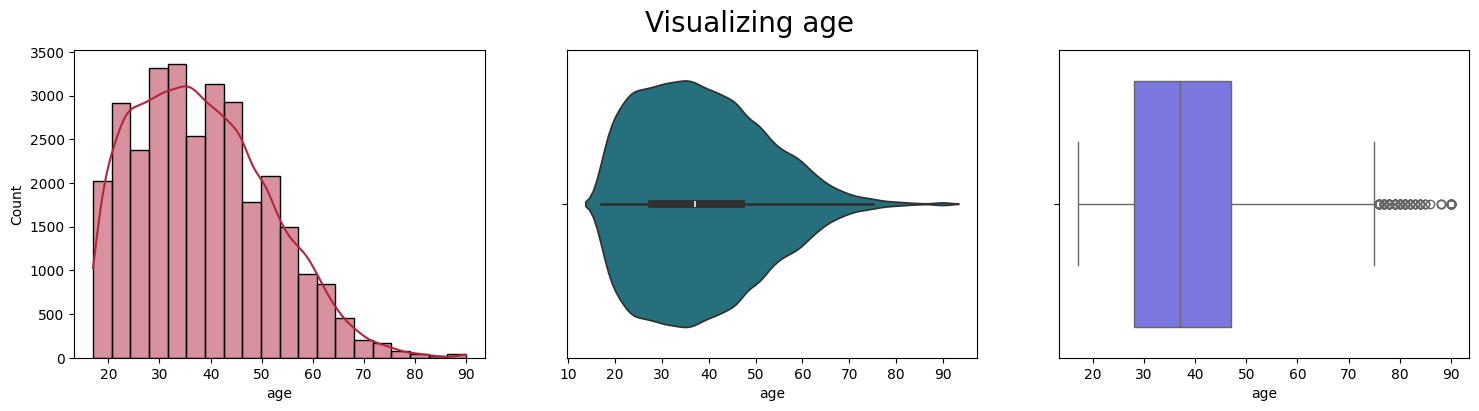

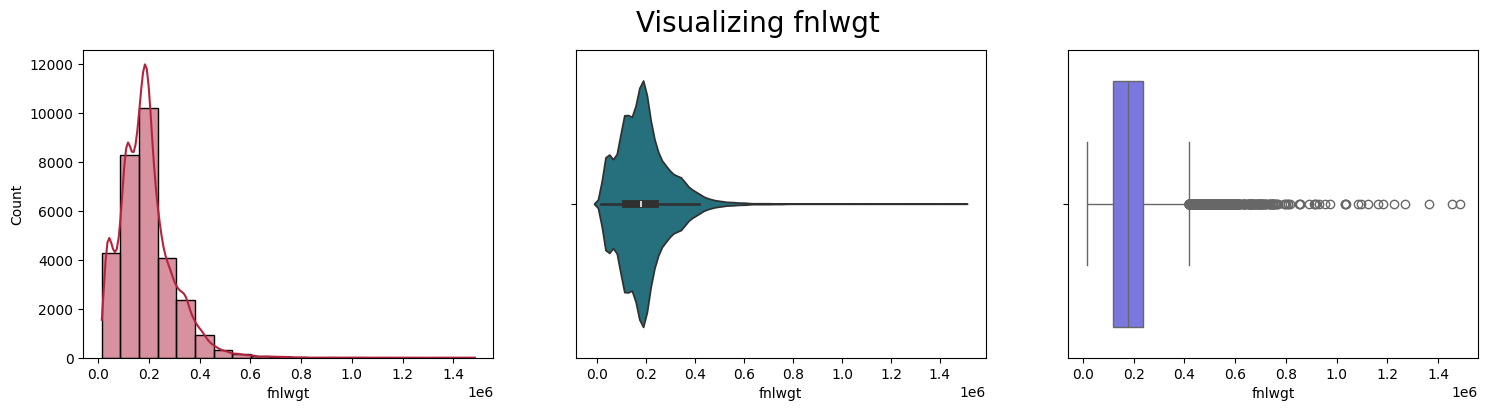

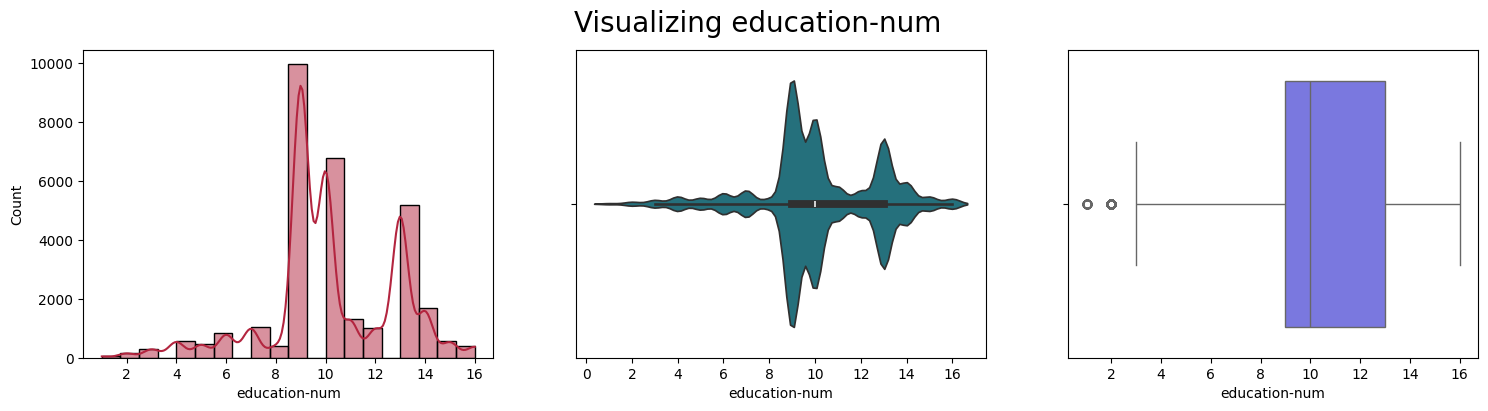

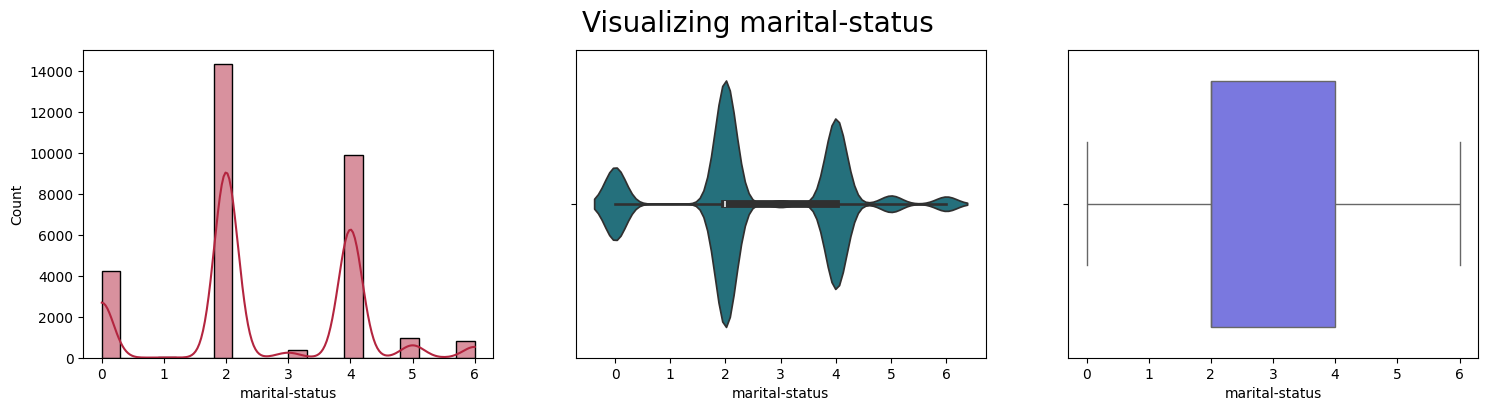

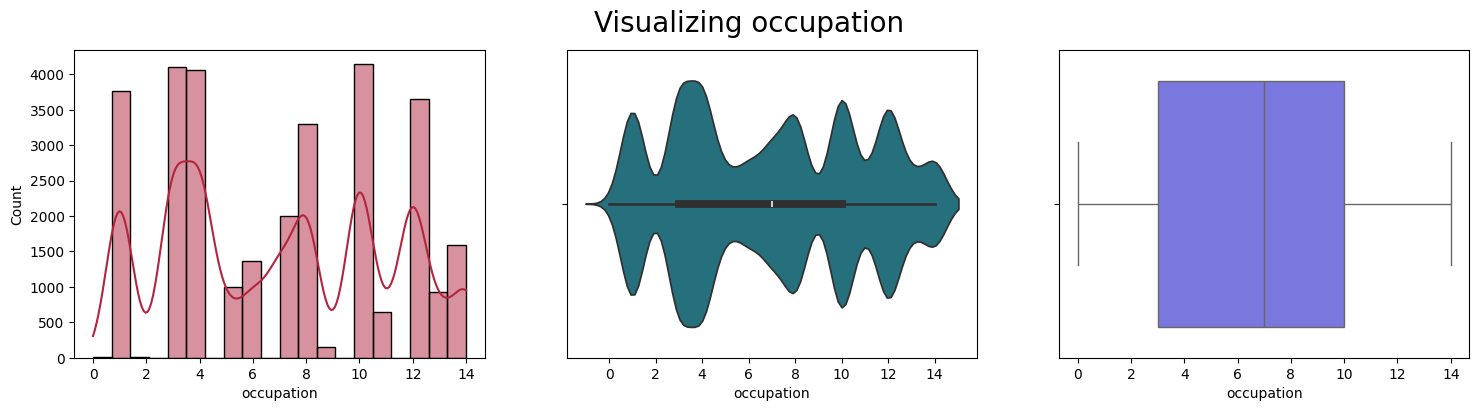

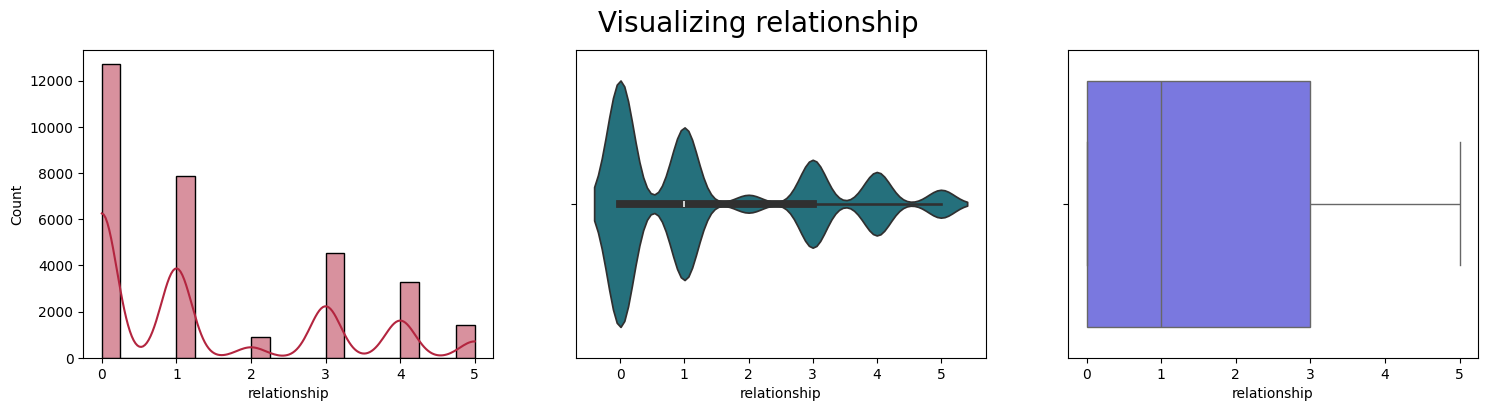

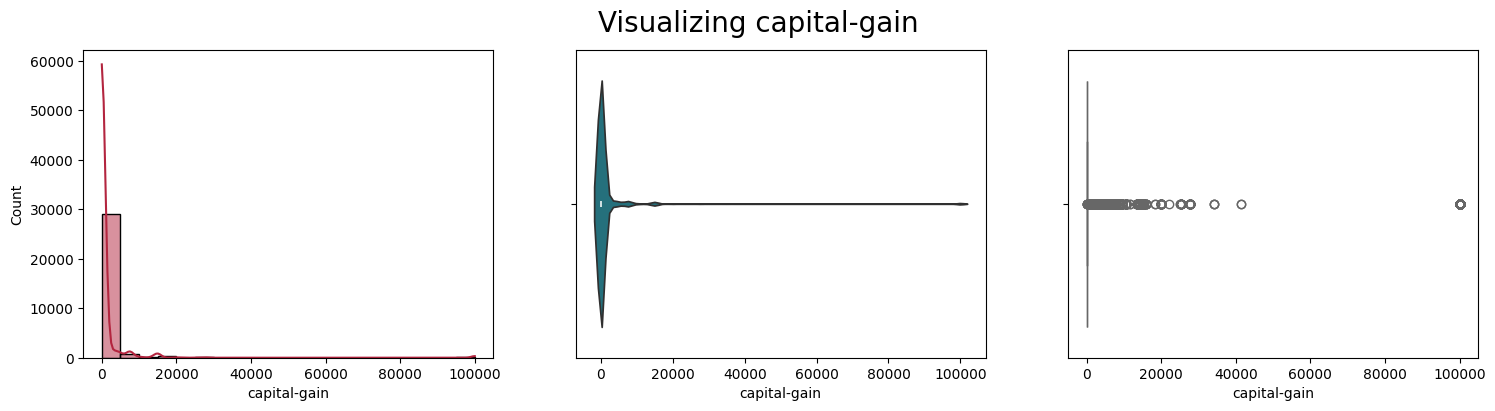

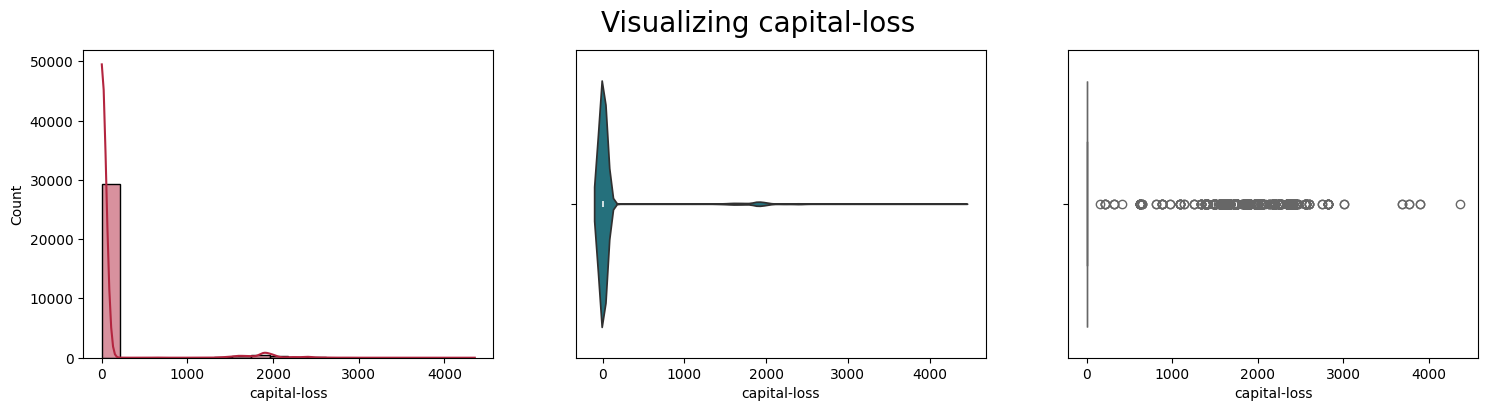

In [34]:
df1=df.drop(["workclass","country","race","sex","salary","hours-per-week"],axis=1)
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

1. Left-Skewed Data:

Age
Fnlwgt
2. Outliers:

Fnlwgt
Education-num
Capital-gain
Capital-loss

**4. Model Development & Classification**

4.1 Data preparation

In [35]:
X= df.drop(['salary'],axis=1)
y=df['salary']
y.value_counts(normalize=True)

,proportion
salary,
0,0.751017
1,0.248983


We need to do sampling to remove bias in training model.

In [36]:
rs = RandomOverSampler(random_state=30)
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [37]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

,proportion
salary,
0,0.5
1,0.5


4.2 Training the dataset

In [38]:
split_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=split_size,random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [39]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (25844, 13)(25844,)
Validation dataset: (6461, 13)(6461,)
Test dataset: (13845, 13)(13845,)


4.3 Model Developement

4.3.1 Initiating the model

In [40]:
models = []
names = ['Random Forest','GaussianNB','DecisionTreeClassifier','Adaboost','Xgboost','LGBM']

models.append((RandomForestClassifier(n_estimators=100)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((AdaBoostClassifier()))
models.append((xgb.XGBClassifier()))
models.append((ltb.LGBMClassifier()))

4.3.2 Cross-vaildating models & choosing best fit.

In [41]:
kfold = KFold(n_splits=5)
for i in range(0,len(models)):
    cv_result = cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
Random Forest: 0.908373316824021
----------------------------------------
GaussianNB: 0.6215756074911004
----------------------------------------
DecisionTreeClassifier: 0.8888716916885931
----------------------------------------
Adaboost: 0.8066862714750038
----------------------------------------
Xgboost: 0.864262498065315
[LightGBM] [Info] Number of positive: 10396, number of negative: 10279
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 20675, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502830 -> initscore=0.011318
[LightGBM] [Info] Start training from score 0.011318
[LightGBM] [Info] Number of positive: 10395, number of negative: 10280
[Light

Random Forest Classifier gets selected as it has the maximum accuracy score.

In [42]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.9038642109064644
----------------------------------------
Confusion Matrix:
[[6022  941]
 [ 390 6492]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6963
           1       0.87      0.94      0.91      6882

    accuracy                           0.90     13845
   macro avg       0.91      0.90      0.90     13845
weighted avg       0.91      0.90      0.90     13845



In [43]:
import pickle

# Save the trained model to a pickle file
with open("adult_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("✅ Model saved as adult_model.pkl")



✅ Model saved as adult_model.pkl


5.**Summary**



*   We have a model with 90% accuracy score.
*   We did not handled outliers or normalised data because random forest models do not get affected with these factors.



In [46]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')